### <b>실전 프로젝트 - GAN을 이용한 얼굴 마스크 이미지 생성 </b>

* 마스크를 착용한 이미지와 마스크를 착용하지 않은 얼굴 이미지를 생성하는 <b>생성 모델</b>을 만드세요.
* 다음의 두 가지 대표적인 GAN 모델을 실습합니다.
    1. [Generative Adversarial Networks (NIPS 2014)](https://arxiv.org/abs/1406.2661)
    2. [Deep Convolutional Generative Adversarial Networks (ICLR 2016)](https://arxiv.org/abs/1511.06434)
* 또한 자신이 원하는 아키텍처의 GAN 모델을 직접 선택하여 학습하는 실습을 진행합니다.
* 본 프로젝트는 <b>최종적으로 높은 점수(score)를 얻는 것이 목표</b>입니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
* 최종적으로 <b>팀 단위로 제출할 파일</b>은 다음과 같습니다.
    1. PPT 파일: 사용한 모델과 최종적인 FID 점수에 대한 설명을 포함하기
    2. Colab Notebook 파일: <b>[파일]</b> - <b>[다운로드]</b> - <b>[.ipynb 다운로드]</b>
    3. 최종 결과 이미지(마스크 착용 1,000개 및 마스크 미착용 1,000개)가 포함된 압축 파일
* 자세한 평가 기준은 <b>Problem 1</b>에서 확인하세요.

#### <b>(알아보기) 데이터셋 다운로드</b>

* 실습을 위해 [<b>Face Mask Classification</b> 데이터셋](https://github.com/ndb796/Face-Mask-Classification-20000-Dataset)을 불러옵니다.
* 데이터셋은 흑백(grayscale) 이미지로 구성됩니다.
* GPU 가속기를 이용하기 위해 <b>[런타임]</b> - <b>[런타임 유형 변경]</b> - <b>[GPU]</b>를 선택합니다.
* <b>학습 데이터셋</b>
    * 마스크 착용(with mask): 9,000장
    * 마스크 미착용(wihtout mask): 9,000장
* <b>테스트 데이터셋</b>
    * 마스크 착용(with mask): 1,000장
    * 마스크 미착용(wihtout mask): 1,000장


In [1]:
!git clone https://github.com/ndb796/Face-Mask-Classification-20000-Dataset

fatal: destination path 'Face-Mask-Classification-20000-Dataset' already exists and is not an empty directory.


#### <b>(알아보기) 필요한 라이브러리 불러오기</b>

* 실습을 위한 PyTorch 라이브러리를 불러옵니다.

In [2]:
import os
import time
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

#### <b>(알아보기) 학습 이미지 시각화</b>

* 학습할 이미지 중에서 원하는 이미지를 골라 시각화합니다.

이미지 크기: (224, 224)


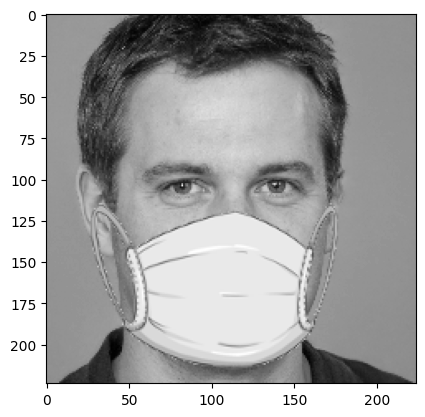

이미지 크기: (224, 224)


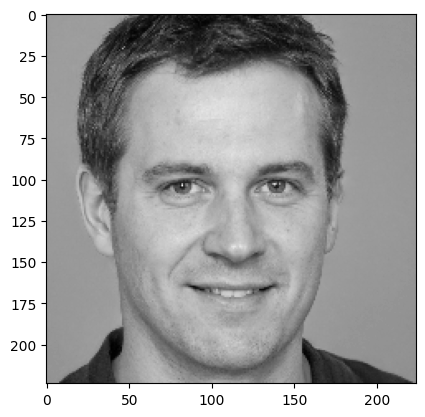

In [3]:
# 마스크를 쓴 이미지 출력
image = Image.open('./Face-Mask-Classification-20000-Dataset/train/with_mask/with-mask-default-mask-seed0030.png')
print("이미지 크기:", image.size)

plt.imshow(image, cmap='gray')
plt.show()

# 마스크를 쓰지 않은 이미지 출력
image = Image.open('./Face-Mask-Classification-20000-Dataset/train/without_mask/seed0030.png')
print("이미지 크기:", image.size)

plt.imshow(image, cmap='gray')
plt.show()

#### <b>(알아보기) 데이터셋 불러오기</b>

* 학습할 이미지 크기: 1 X 64 X 64

In [4]:
transforms_train = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)) # normalization
])

data_dir = './Face-Mask-Classification-20000-Dataset/'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
print('Train dataset size:', len(train_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

Train dataset size: 18000
Class names: ['with_mask', 'without_mask']


#### <b>Problem 1. 나만의 모델을 만들어 학습 및 평가하기</b>

* 나만의 GAN 모델을 이용해 <b>최대한 높은 FID 점수</b>를 받아보세요.
    * (Hint) 200 epochs 이상으로 학습해보기
    * (Hint) DCGAN의 아키텍처를 효율적으로 바꿔보기
    * (Hint) WGAN 등 [다른 아키텍처들을](https://github.com/eriklindernoren/PyTorch-GAN) 적용해보기
    * (Hint) 사전 학습된(pre-trained) GAN 모델 사용해보기
* 결과적으로 자신이 학습한 모델의 <b>최종 FID 점수(score)를 작성</b>하세요.
    * 마스크 착용 및 미착용 이미지를 <b>각각 1,000장씩 생성</b>하여 FID를 계산합니다.
    * 마스크 착용: {답을 쓰세요.}
    * 마스크 미착용: {답을 쓰세요.}
* 결과 이미지의 해상도는 1 X 64 X 64가 되어야 합니다.

In [5]:
!pip install stylegan2_pytorch

In [6]:
from stylegan2_pytorch.stylegan2_pytorch import Generator, Discriminator, Trainer

In [7]:
# 생성자(generator)와 판별자(discriminator) 초기화
image_size = 1 * 64 * 64
latent_dim = 100
n_classes = 2

# custom_generator = Generator(image_size, latent_dim)
# custom_discriminator = Discriminator(image_size)
trainer_with_mask = Trainer('with_mask', models_dir='models/with_mask', image_size=image_size)
trainer_without_mask = Trainer('without_mask', models_dir='models/without_mask', image_size=image_size)

trainer_with_mask.set_data_src('./Face-Mask-Classification-20000-Dataset/train/with_mask')
trainer_without_mask.set_data_src('./Face-Mask-Classification-20000-Dataset/train/without_mask')

# custom_generator.cuda()
# custom_discriminator.cuda()

# # 손실 함수(loss function)
# adversarial_loss = nn.MSELoss()
# adversarial_loss.cuda()

# 학습률(learning rate) 설정
lr = 0.00005

# 생성자와 판별자를 위한 최적화 함수
# optimizer_G = torch.optim.RMSprop(custom_generator.parameters(), lr=lr)
# optimizer_D = torch.optim.RMSprop(custom_discriminator.parameters(), lr=lr)

In [36]:
n_epochs = 10 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정
# clip_value = 0.01
start_time = time.time()

for epoch in range(n_epochs):
    trainer_with_mask.train()
    trainer_with_mask.print_log()

OutOfMemoryError: ignored

In [ ]:
# 모델 학습하는 코드 작성하기
!mkdir -p ./results/stylegan2/

n_epochs = 300 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정
# clip_value = 0.01
start_time = time.time()

for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(train_dataloader):

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성
        real = torch.cuda.FloatTensor(imgs.shape[0], 1).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(imgs.shape[0], 1).fill_(0.0) # 가짜(fake): 0

        real_imgs = imgs.cuda()
        labels = labels.cuda()

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 랜덤 노이즈(noise) 및 랜덤 레이블(label) 샘플링
        z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).cuda()
        generated_labels = torch.randint(0, n_classes, (imgs.shape[0],)).cuda()

        # 이미지 생성
        generated_imgs = custom_generator(z, generated_labels)

        # 생성자(generator)의 손실(loss) 값 계산
        # g_loss = adversarial_loss(custom_discriminator(generated_imgs, generated_labels), real)
        g_loss = -torch.mean(custom_discriminator(generated_imgs, generated_labels))

        # 생성자(generator) 업데이트
        g_loss.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        d_loss = -torch.mean(custom_discriminator(real_imgs, labels)) + torch.mean(custom_discriminator(generated_imgs.detach(), generated_labels))

        # 판별자(discriminator) 업데이트
        d_loss.backward()
        optimizer_D.step()

        # for p in custom_discriminator.parameters():
        #     p.data.clamp_(-clip_value, clip_value)

        done = epoch * len(train_dataloader) + i
        if done % sample_interval == 0:
            # 클래스당 8개의 이미지를 생성하여 2 X 8 격자 이미지에 출력
            z = torch.normal(mean=0, std=1, size=(n_classes * 8, latent_dim)).cuda()
            labels = torch.LongTensor([i for i in range(n_classes) for _ in range(8)]).cuda()
            generated_imgs = custom_generator(z, labels)
            save_image(generated_imgs, f"./results/wgan/{done:0>4}.png", nrow=8, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    print(f"[Epoch {epoch+1}/{n_epochs}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")

    # 모델 파라미터 저장
    if (epoch + 1) % 50 == 0 and (epoch + 1) >= 100:
        torch.save(custom_generator.state_dict(), f"WGAN_Generator_for_Face_Mask_{epoch + 1}.pt")
        torch.save(custom_discriminator.state_dict(), f"WGAN_Discriminator_for_Face_Mask_{epoch + 1}.pt")
        print(f"Model # {epoch + 1} saved!")

[Epoch 1/300] [D loss: 0.387791] [G loss: -0.413557] [Elapsed time: 28.65s]
[Epoch 2/300] [D loss: -0.812004] [G loss: -0.184683] [Elapsed time: 56.52s]
[Epoch 3/300] [D loss: -0.966183] [G loss: -0.341312] [Elapsed time: 83.46s]
[Epoch 4/300] [D loss: -0.809861] [G loss: -0.494649] [Elapsed time: 113.47s]
[Epoch 5/300] [D loss: -0.386826] [G loss: -0.289020] [Elapsed time: 141.62s]
[Epoch 6/300] [D loss: -0.349960] [G loss: -1.834082] [Elapsed time: 169.95s]
[Epoch 7/300] [D loss: -0.509842] [G loss: -1.735946] [Elapsed time: 198.36s]
[Epoch 8/300] [D loss: -1.149861] [G loss: 0.119781] [Elapsed time: 226.62s]
[Epoch 9/300] [D loss: -0.407894] [G loss: -1.162194] [Elapsed time: 254.25s]
[Epoch 10/300] [D loss: -0.846025] [G loss: 1.074460] [Elapsed time: 280.92s]
[Epoch 11/300] [D loss: -0.103710] [G loss: -0.340007] [Elapsed time: 309.00s]
[Epoch 12/300] [D loss: -0.007669] [G loss: -0.187624] [Elapsed time: 337.55s]
[Epoch 13/300] [D loss: -0.408895] [G loss: -0.179112] [Elapsed tim

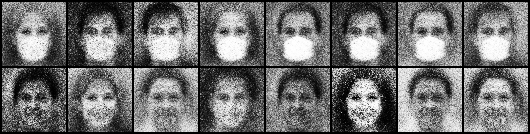

In [ ]:
from IPython.display import Image as Display
img_lst = (os.listdir('./results/wgan'))
print(img_lst)
idx = -1

Display(f'./results/wgan/{img_lst[idx]}')

* 마스크를 착용한 얼굴을 생성합니다.

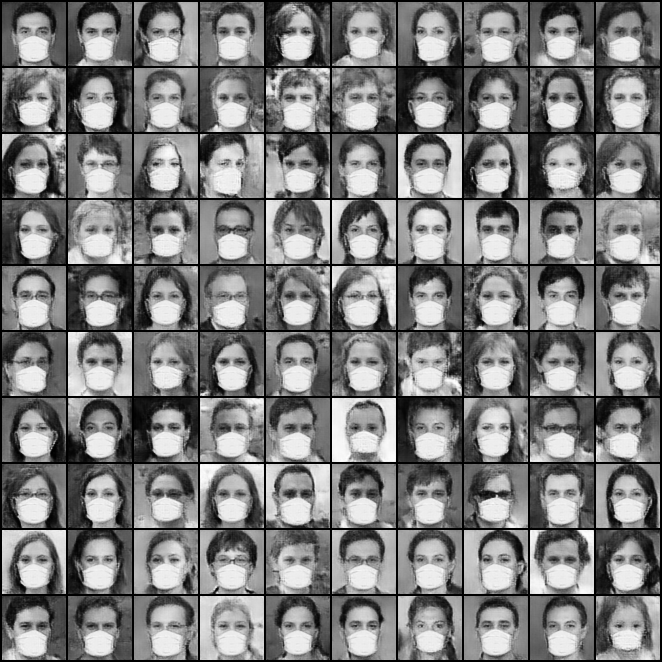

In [ ]:
from IPython.display import Image as Display

# 랜덤 노이즈(noise) 및 랜덤 레이블(label) 샘플링
z = torch.normal(mean=0, std=1, size=(100, latent_dim)).cuda()
generated_labels = torch.cuda.IntTensor(100).fill_(0)

# 이미지 생성
generated_imgs = dcgan_generator(z, generated_labels)

# 생성된 이미지 중에서 100개를 선택하여 10 X 10 격자 이미지에 출력
save_image(generated_imgs.data[:100], f'./results/dcgan/with_mask.png', nrow=10, normalize=True)

Display('./results/dcgan/with_mask.png')

* 마스크를 착용하지 않은 얼굴을 생성합니다.

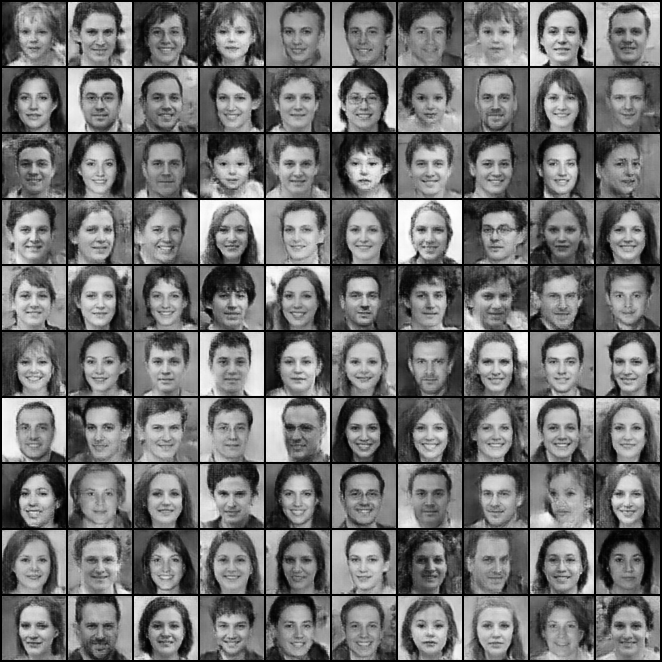

In [ ]:
from IPython.display import Image as Display

# 랜덤 노이즈(noise) 및 랜덤 레이블(label) 샘플링
z = torch.normal(mean=0, std=1, size=(100, latent_dim)).cuda()
generated_labels = torch.cuda.IntTensor(100).fill_(1)

# 이미지 생성
generated_imgs = dcgan_generator(z, generated_labels)

# 생성된 이미지 중에서 100개를 선택하여 10 X 10 격자 이미지에 출력
save_image(generated_imgs.data[:100], f'./results/dcgan/with_no_mask.png', nrow=10, normalize=True)

Display('./results/dcgan/with_no_mask.png')

In [ ]:
# 마스크를 착용한 총 10 * 100개의 얼굴 이미지를 생성
for i in range(10):
    # 랜덤 노이즈(noise) 및 랜덤 레이블(label) 샘플링
    z = torch.normal(mean=0, std=1, size=(100, latent_dim)).cuda()
    generated_labels = torch.cuda.IntTensor(100).fill_(0)
    # 이미지 생성
    generated_imgs = dcgan_generator(z, generated_labels)

    for j in range(100):
        save_image(generated_imgs.data[j], f'./results/wgan/with_mask/{i * 100 + j}.png', normalize=True)


# 마스크를 착용한 총 10 * 100개의 얼굴 이미지를 생성
for i in range(10):
    # 랜덤 노이즈(noise) 및 랜덤 레이블(label) 샘플링
    z = torch.normal(mean=0, std=1, size=(100, latent_dim)).cuda()
    generated_labels = torch.cuda.IntTensor(100).fill_(1)
    # 이미지 생성
    generated_imgs = dcgan_generator(z, generated_labels)

    for j in range(100):
        save_image(generated_imgs.data[j], f'./results/wgan/without_mask/{i * 100 + j}.png', normalize=True)

In [ ]:
!git clone https://github.com/hukkelas/pytorch-frechet-inception-distance

In [ ]:
# 평가 수행
!python ./pytorch-frechet-inception-distance/fid.py --path1 ./results/wgan/without_mask --path2 ./Face-Mask-Classification-20000-Dataset/test/without_mask --batch-size 32

In [ ]:
# 평가 수행
!python ./pytorch-frechet-inception-distance/fid.py --path1 ./results/wgan/with_mask --path2 ./Face-Mask-Classification-20000-Dataset/test/with_mask --batch-size 32

In [ ]:
# ./results/custom/ 폴더의 모든 파일을 results.zip라는 이름으로 압축
!zip ./results.zip -r ./results/custom/*

In [ ]:
# Google Colab으로부터 results.zip 압축 파일 다운로드
from google.colab import files

files.download('./results.zip')

* PPT에 들어갈 내용
    1. 최종적으로 얻은 점수 (마스크 미착용 FID 점수 + 마스크 착용 FID 점수)
    2. 좋은 결과를 만들기 위해 어떤 전략을 사용했는지, 그 이유는 무엇인지
    3. 소스코드에서 핵심이 되는 부분 캡처 사진 및 설명
    4. 자신의 GAN에서 생성된 이미지들 캡처 사진
* 점수 판정 기준
    * <b>FID의 점수 합이 가장 작은 팀</b>이 1등입니다.
    * 마스크 미착용 FID 점수 = 171.67이고, 마스크 착용 FID 점수 = 114.97이라면?
    * 최종 점수 = 171.67 + 114.97 = 286.64
* 최종적으로 <b>팀 단위로 제출할 파일</b>은 다음과 같습니다.
    1. PPT 파일: 사용한 모델과 최종적인 FID 점수에 대한 설명을 포함하기
    2. Colab Notebook 파일: <b>[파일]</b> - <b>[다운로드]</b> - <b>[.ipynb 다운로드]</b>
    3. 최종 결과 이미지(마스크 착용 1,000개 및 마스크 미착용 1,000개)가 포함된 압축 파일
* 최종 결과 이미지는 다음과 같은 양식으로 압축 파일(.zip) 형태로 제출합니다.
    * with_mask와 without_mask 이미지들이 서로 다른 폴더로 확실히 구분되어야 합니다.
    * <b>PPT에 기록된 FID 점수와 동일한 점수</b>가 나오는 이미지여야 합니다.

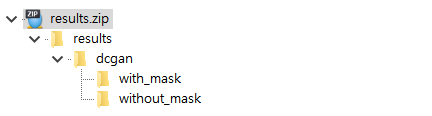

* GAN은 학습이 어려운 네트워크 중 하나입니다.
    * 학습 자체가 안 되는 문제가 발생할 수 있습니다. (처음부터 D loss: 0.5, G loss: 1.0 고정되는 문제)
    * 같은 레이블에 대하여 거의 똑같은 이미지만 생성될 수 있습니다. (mode collapse)
* (Hint) 학습이 잘 안 되는 경우 배치 사이즈, learning rate, 아키텍처를 다시 확인하고 조절합니다.
* FID 점수는 이미지 생성을 할 때마다 변경될 수 있습니다.
    * 실제로 해당 FID 점수가 나왔는지 확인할 필요가 있으므로, 생성된 이미지 파일(총 2,000장)을 꼭 함께 제출합니다.